## Create some thresholds to add to the CSV

In [4]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/orcd/data/edboyden/002/ezh/uni/datasets/her2.csv')

# Rename the original column
# df = df.rename(columns={'HER2_Amp': 'her2_median'})

# delete the above median col
# delete the above median column
# df = df.drop(columns=['her2_above_median'])

top_40_cutoff = df['her2_median'].quantile(0.60)
df['her2_top_40'] = (df['her2_median'] > top_40_cutoff).astype(int)

# Threshold 3: Top 25%
top_25_cutoff = df['her2_median'].quantile(0.75)
df['her2_top_25'] = (df['her2_median'] > top_25_cutoff).astype(int)

# Threshold 4: Top 10%
top_10_cutoff = df['her2_median'].quantile(0.90)
df['her2_top_10'] = (df['her2_median'] > top_10_cutoff).astype(int)

# Display the first few rows
df.head()


,Sample_ID,ERBB2,her2_median,her2_top_40,her2_top_25,her2_top_10,log_ERBB2,her2_log_above_median,her2_log_top_40,her2_log_top_25,her2_log_top_10
0,TCGA-F5-6861,4736.6678,0,0,0,0,8.463300,0,0,0,0
1,TCGA-EI-6509,511917.4691,1,0,0,0,13.145921,1,1,1,1
2,TCGA-F5-6864,7501.1355,1,0,0,0,8.922943,1,1,1,1
3,TCGA-DC-6155,2457.5163,0,0,0,0,7.807313,0,0,0,0
4,TCGA-AH-6547,4242.6181,0,0,0,0,8.353172,0,0,0,0


In [21]:
# rename the erbb_log_x columns to her2_log_x
# Rename the erbb2_log_x columns to her2_log_x
df = df.rename(columns={
    'erbb2_log_above_median': 'her2_log_above_median',
    'erbb2_log_top_40': 'her2_log_top_40',
    'erbb2_log_top_25': 'her2_log_top_25',
    'erbb2_log_top_10': 'her2_log_top_10'
})

# Display the first few rows after renaming
print("Columns after renaming:")
print(df.columns.tolist())


Columns after renaming:
['Sample_ID', 'ERBB2', 'her2_median', 'her2_top_40', 'her2_top_25', 'her2_top_10', 'log_ERBB2', 'her2_log_above_median', 'her2_log_top_40', 'her2_log_top_25', 'her2_log_top_10']


In [22]:
# save the new columns
# Save the updated dataframe with new columns to a new CSV file
df.to_csv('/orcd/data/edboyden/002/ezh/uni/datasets/her2.csv', index=False)


## Visualize the Distribution

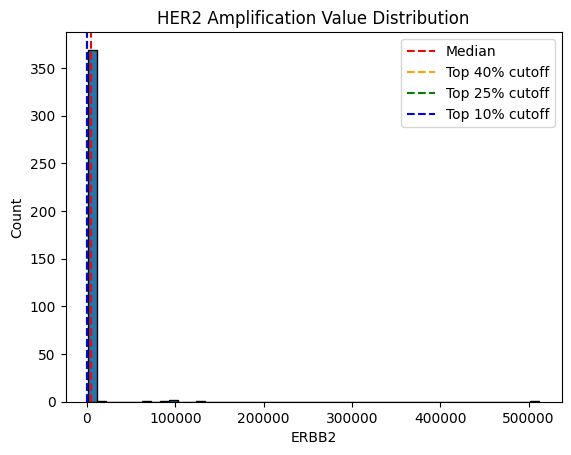

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(df['ERBB2'], bins=50, edgecolor='k')
median = df['ERBB2'].median()
plt.axvline(median, color='r', linestyle='--', label='Median')
plt.axvline(top_40_cutoff, color='orange', linestyle='--', label='Top 40% cutoff')
plt.axvline(top_25_cutoff, color='green', linestyle='--', label='Top 25% cutoff')
plt.axvline(top_10_cutoff, color='blue', linestyle='--', label='Top 10% cutoff')
plt.title('HER2 Amplification Value Distribution')
plt.xlabel('ERBB2')
plt.ylabel('Count')
plt.legend()
plt.show()


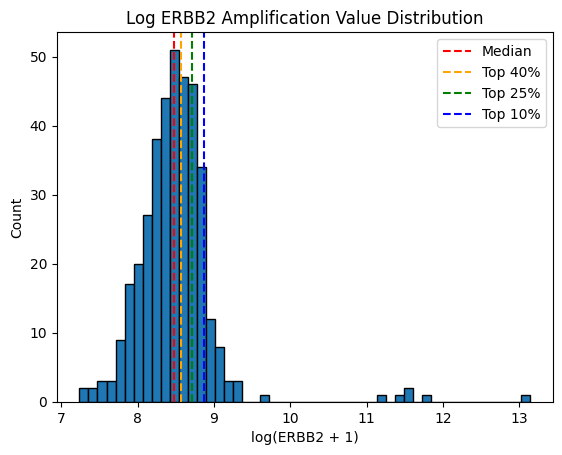

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Log-transform ERBB2
df['log_ERBB2'] = np.log1p(df['ERBB2'])  # log1p handles zero safely

# Step 2: Compute thresholds on log-transformed values
log_median = df['log_ERBB2'].median()
log_top_40 = df['log_ERBB2'].quantile(0.60)
log_top_25 = df['log_ERBB2'].quantile(0.75)
log_top_10 = df['log_ERBB2'].quantile(0.90)

# Step 3: Assign binary labels
df['erbb2_log_above_median'] = (df['log_ERBB2'] > log_median).astype(int)
df['erbb2_log_top_40'] = (df['log_ERBB2'] > log_top_40).astype(int)
df['erbb2_log_top_25'] = (df['log_ERBB2'] > log_top_25).astype(int)
df['erbb2_log_top_10'] = (df['log_ERBB2'] > log_top_10).astype(int)

# Step 4: Plot histogram
plt.hist(df['log_ERBB2'], bins=50, edgecolor='k')
plt.axvline(log_median, color='r', linestyle='--', label='Median')
plt.axvline(log_top_40, color='orange', linestyle='--', label='Top 40%')
plt.axvline(log_top_25, color='green', linestyle='--', label='Top 25%')
plt.axvline(log_top_10, color='blue', linestyle='--', label='Top 10%')
plt.title('Log ERBB2 Amplification Value Distribution')
plt.xlabel('log(ERBB2 + 1)')
plt.ylabel('Count')
plt.legend()
plt.show()
